In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scio import scio
import numba as nb

In [9]:
@nb.njit(parallel=True)
def band_filt(pol00,width=4):
    newarr=np.empty((pol00.shape[0],pol00.shape[1]//width),dtype=pol00.dtype)
    nrows=pol00.shape[0]
    ncols=newarr.shape[1]
    for i in nb.prange(nrows):
        for j in range(ncols):
            newarr[i,j]=np.median(pol00[i,j*width:(j+1)*width])
    return newarr

In [3]:
pol00=scio.read("/home/mohan/Projects/uapishka_202403/data/17093/1709384825/pol00.scio.bz2")

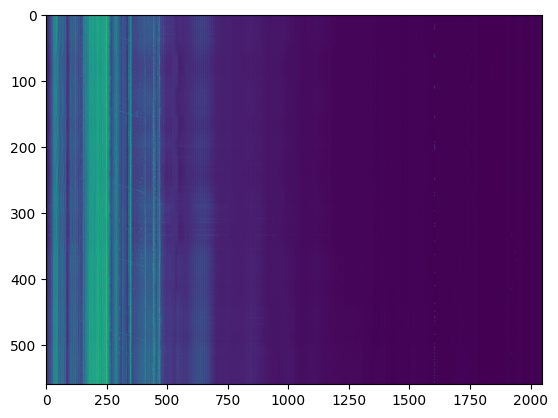

In [10]:
plt.imshow(np.log10(pol00),aspect='auto')

In [31]:
df = 250/4096
band_idx = [int(5/df), int(15/df)]
band_powers = np.median(pol00[:,band_idx[0]:band_idx[1]],axis=1)

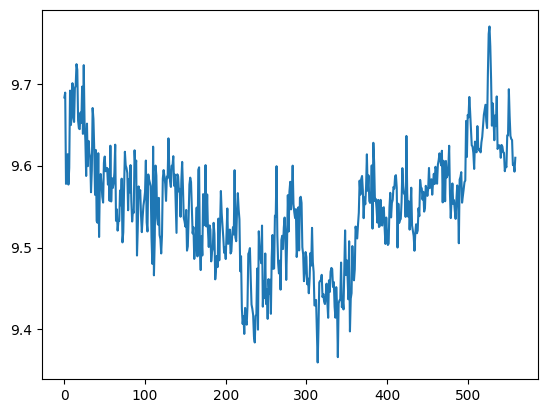

In [32]:
plt.plot(np.log10(band_powers))

In [37]:
percentile=0.1
perc_nrows = int(band_powers.shape[0]*0.1)
low_idx = np.argsort(band_powers)[:perc_nrows]
print(low_idx)

[314 339 236 235 223 354 313 240 315 226 221 225 252 327 336 222 237 234
 238 256 346 233 220 224 344 335 246 227 310 311 338 232 323 250 340 326
 322 341 312 342 345 352 355 248 320 324 321 254 303 356 329 268 251 337
 333 301]


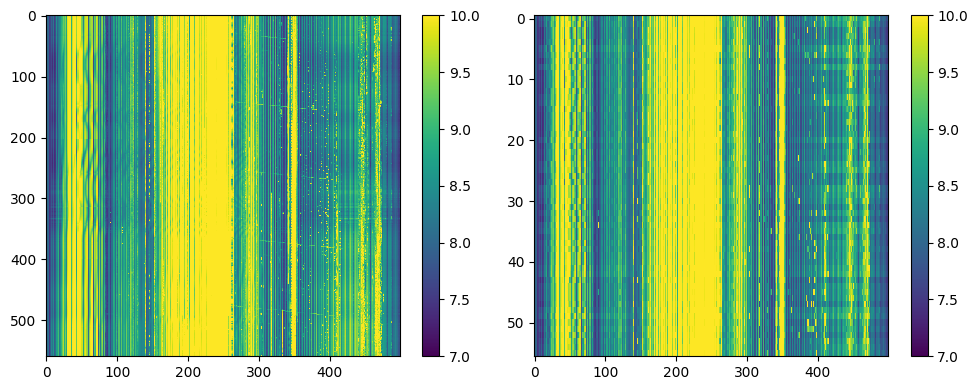

In [52]:
f=plt.gcf()
f.set_size_inches(10,4)

plt.subplot(121)
plt.imshow(np.log10(pol00[:,:500]),aspect='auto',vmin=7,vmax=10,interpolation="none")
plt.colorbar()

plt.subplot(122)
plt.imshow(np.log10(pol00[low_idx,:500]),aspect='auto',vmin=7,vmax=10,interpolation="none")
plt.colorbar()
plt.tight_layout()